# Finite-Length Capacity of the BSC and BEC Channels

This code is provided as supplementary material of the lecture Channel Coding 2 - Advanced Methods.

This code illustrates
* Calculating the finite-length capacity of the BSC and BEC channels using the normal approximation
* Illustrating the finite-length capacity for different code lengths and different error rates

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Binary Symmetric Channel (BSC)

Start with the BSC for which we have
\begin{equation*}
C_\text{BSC} = 1 - h(\delta) = 1+\delta\log_2(\delta)+(1-\delta)\log_2(1-\delta)
\end{equation*}
and
\begin{equation*}
V_\text{BSC} = \delta(1-\delta)\left(\log_2\left(\frac{1-\delta}{\delta}\right)\right)^2
\end{equation*}

In [47]:
# capacity of the BSC
def C_BSC(delta):    
    binary_entropy = -delta*np.log2(delta) - (1-delta)*np.log2(1-delta)
    if delta < 1e-20:
        binary_entropy = 0    
    return 1 - binary_entropy

# dispersion of the BSC
def V_BSC(delta):
    V = np.square(np.log2((1-delta)/delta)) * delta * (1-delta)
    if delta < 1e-20:
        V = 0
    return V

The finite-length capacity for the BSC channel is given by
\begin{equation*}
r = \frac{\log_2(M)}{n} \approx C - \sqrt{\frac{V}{n}}Q^{-1}(P_e) + \frac{\log_2(n)}{2n}
\end{equation*}
We can solve this equation for $P_e$, which gives
\begin{equation*}
P_e \approx Q\left(\frac{n(C-r) + \frac{1}{2}\log_2(n)}{\sqrt{Vn}}\right)
\end{equation*}
For a given channel (i.e., a given $\delta$), we can compute the capacity $C$ and the dispersion $V$ and then use it to get an estimate of what error rate an ideal code with an idea decoder could achieve. Note that this is only an estimate and we do not know the exact value. However, we can compute upper and lower bounds, which are relatively close to the approximation (beyond the scope of this lecture).

In [48]:
def get_Pe_finite_length_BSC(n, r, delta):
    # compute capacity
    C = C_BSC(delta)
    
    # compute dispersion
    V = V_BSC(delta)
    
    # Q-function is "norm.sf" (survival function)
    return norm.sf((n*(C-r) + 0.5*np.log2(n))/np.sqrt(n*V))

Show finite length capacity estimates for some codes of different lengths $n$

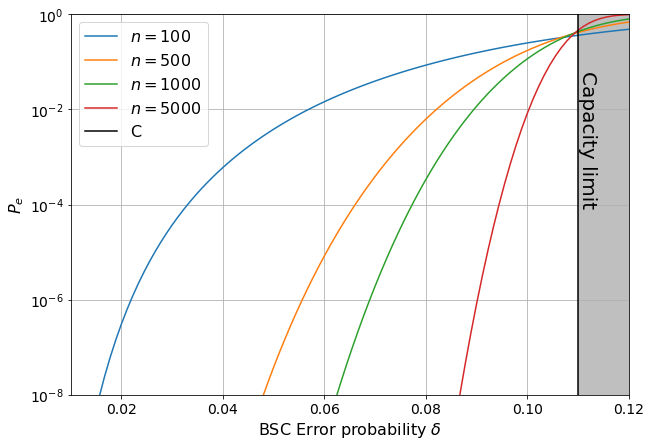

In [25]:
delta_range = np.linspace(0.01,0.12,100)


Pe_BSC_r12_n100 = [get_Pe_finite_length_BSC(100, 0.5, delta) for delta in delta_range]
Pe_BSC_r12_n500 = [get_Pe_finite_length_BSC(500, 0.5, delta) for delta in delta_range]
Pe_BSC_r12_n1000 = [get_Pe_finite_length_BSC(1000, 0.5, delta) for delta in delta_range]
Pe_BSC_r12_n5000 = [get_Pe_finite_length_BSC(5000, 0.5, delta) for delta in delta_range]

fig = plt.figure(1,figsize=(10,7))
plt.semilogy(delta_range, Pe_BSC_r12_n100)
plt.semilogy(delta_range, Pe_BSC_r12_n500)
plt.semilogy(delta_range, Pe_BSC_r12_n1000)
plt.semilogy(delta_range, Pe_BSC_r12_n5000)

plt.axvspan(0.11, 0.12, alpha=0.5, color='gray')
plt.axvline(x=0.11, color='k')
plt.ylim((1e-8,1))
plt.xlim((0.01,0.12))
plt.xlabel('BSC Error probability $\delta$', fontsize=16)
plt.ylabel('$P_e$', fontsize=16)
plt.legend(['$n = 100$', '$n=500$','$n=1000$', '$n=5000$', 'C'], fontsize=16)
plt.text(0.11, 1e-4, 'Capacity limit', {'color': 'k', 'fontsize': 20, 'rotation': -90})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig('BSC_Pe_R12.pdf',bbox_inches='tight')

Different representation, for a given channel (and here, we pick $\delta = 0.11$), show the rate the code should at most have to allow for decoding with an error rate $P_e$ (here we specify different $P_e$) if a certain length $n$ is available.

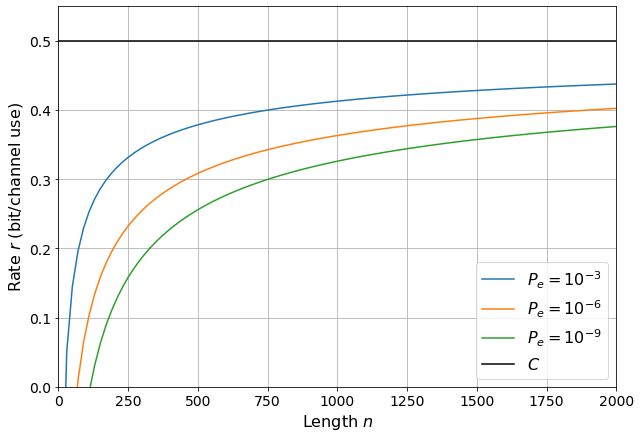

In [7]:
#specify \delta
delta = 0.11

n_range = np.linspace(10,2000,100)


C = C_BSC(delta)
V = V_BSC(delta)

r_Pe_1em3 = [C - np.sqrt(V/n)*norm.isf(1e-3) + 0.5*np.log2(n)/n for n in n_range]
r_Pe_1em6 = [C - np.sqrt(V/n)*norm.isf(1e-6) + 0.5*np.log2(n)/n for n in n_range]
r_Pe_1em9 = [C - np.sqrt(V/n)*norm.isf(1e-9) + 0.5*np.log2(n)/n for n in n_range]

fig = plt.figure(1,figsize=(10,7))
plt.plot(n_range, r_Pe_1em3)
plt.plot(n_range, r_Pe_1em6)
plt.plot(n_range, r_Pe_1em9)
plt.axhline(y=C, color='k')
plt.ylim((0,0.55))
plt.xlim((0,2000))
plt.xlabel('Length $n$', fontsize=16)
plt.ylabel('Rate $r$ (bit/channel use)', fontsize=16)
plt.legend(['$P_e = 10^{-3}$', '$P_e = 10^{-6}$','$P_e = 10^{-9}$', '$C$'], fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig('BSC_r_delta_011.pdf',bbox_inches='tight')

***
## Binary Erasure Channel (BEC)

For the BEC, we have
\begin{equation*}
C_\text{BEC} = 1 - \epsilon
\end{equation*}
and
\begin{equation*}
V_\text{BEC} = \epsilon(1-\epsilon)
\end{equation*}

In [22]:
# capacity of the BSC
def C_BEC(epsilon):    
    return 1 - epsilon

# dispersion of the BSC
def V_BEC(epsilon):
    return epsilon*(1-epsilon)

The finite-length capacity for the BEC channel is given by (note, here we do not use the correction term)
\begin{equation*}
r = \frac{\log_2(M)}{n} \approx C - \sqrt{\frac{V}{n}}Q^{-1}(P_e)
\end{equation*}
We can solve this equation for $P_e$, which gives
\begin{equation*}
P_e \approx Q\left(\frac{\sqrt{n}(C-r)}{\sqrt{V}}\right)
\end{equation*}
For a given channel (i.e., a given $\epsilon$), we can compute the capacity $C$ and the dispersion $V$ and then use it to get an estimate of what error rate an ideal code with an idea decoder could achieve. Note that this is only an estimate and we do not know the exact value. However, we can compute upper and lower bounds, which are relatively close to the approximation (beyond the scope of this lecture).

In [40]:
def get_Pe_finite_length_BEC(n, r, epsilon):
    # compute capacity
    C = C_BEC(epsilon)
    
    # compute dispersion
    V = V_BEC(epsilon)
     
    # Q-function is "norm.sf" (survival function)
    return norm.sf((n*(C-r))/np.sqrt(n*V))

Show finite length capacity estimates for some codes of different lengths $n$

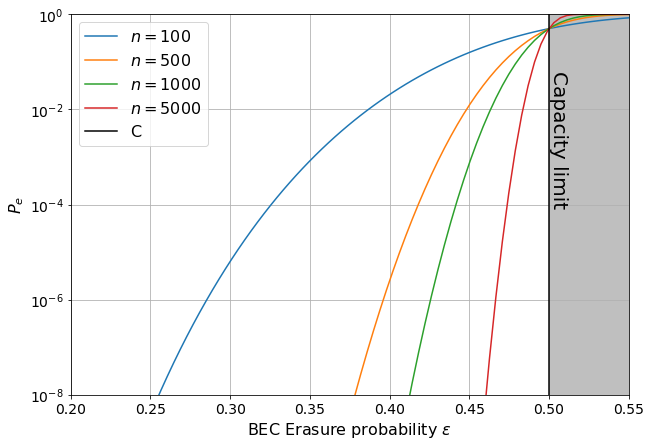

In [46]:
epsilon_range = np.linspace(0.2,0.6,100)


Pe_BEC_r12_n100 = [get_Pe_finite_length_BEC(100, 0.5, epsilon) for epsilon in epsilon_range]
Pe_BEC_r12_n500 = [get_Pe_finite_length_BEC(500, 0.5, epsilon) for epsilon in epsilon_range]
Pe_BEC_r12_n1000 = [get_Pe_finite_length_BEC(1000, 0.5, epsilon) for epsilon in epsilon_range]
Pe_BEC_r12_n5000 = [get_Pe_finite_length_BEC(5000, 0.5, epsilon) for epsilon in epsilon_range]

fig = plt.figure(1,figsize=(10,7))
plt.semilogy(epsilon_range, Pe_BEC_r12_n100)
plt.semilogy(epsilon_range, Pe_BEC_r12_n500)
plt.semilogy(epsilon_range, Pe_BEC_r12_n1000)
plt.semilogy(epsilon_range, Pe_BEC_r12_n5000)

plt.axvspan(0.5, 0.55, alpha=0.5, color='gray')
plt.axvline(x=0.5, color='k')
plt.ylim((1e-8,1))
plt.xlim((0.2,0.55))
plt.xlabel('BEC Erasure probability $\epsilon$', fontsize=16)
plt.ylabel('$P_e$', fontsize=16)
plt.legend(['$n = 100$', '$n=500$','$n=1000$', '$n=5000$', 'C'], fontsize=16)
plt.text(0.5, 1e-4, 'Capacity limit', {'color': 'k', 'fontsize': 20, 'rotation': -90})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig('BEC_Pe_R12.pdf',bbox_inches='tight')

Different representation, for a given channel (and here, we pick $\epsilon = 0.5$), show the rate the code should at most have to allow for decoding with an error rate $P_e$ (here we specify different $P_e$) if a certain length $n$ is available.

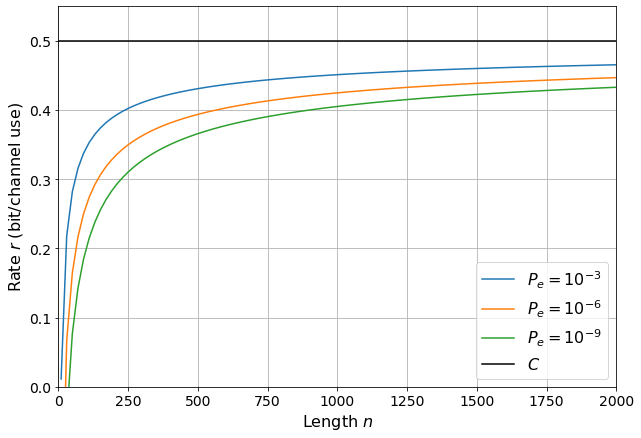

In [51]:
#specify \epsilon
epsilon = 0.5

n_range = np.linspace(10,2000,100)


C = C_BEC(epsilon)
V = V_BEC(epsilon)

r_Pe_1em3 = [C - np.sqrt(V/n)*norm.isf(1e-3) for n in n_range]
r_Pe_1em6 = [C - np.sqrt(V/n)*norm.isf(1e-6) for n in n_range]
r_Pe_1em9 = [C - np.sqrt(V/n)*norm.isf(1e-9) for n in n_range]

fig = plt.figure(1,figsize=(10,7))
plt.plot(n_range, r_Pe_1em3)
plt.plot(n_range, r_Pe_1em6)
plt.plot(n_range, r_Pe_1em9)
plt.axhline(y=C, color='k')
plt.ylim((0,0.55))
plt.xlim((0,2000))
plt.xlabel('Length $n$', fontsize=16)
plt.ylabel('Rate $r$ (bit/channel use)', fontsize=16)
plt.legend(['$P_e = 10^{-3}$', '$P_e = 10^{-6}$','$P_e = 10^{-9}$', '$C$'], fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.savefig('BEC_r_epsilon_05.pdf',bbox_inches='tight')